# Find CP-hard

**CP-hard**: Cases that ground truth is not in predicted set.

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
os.getcwd()
anl_data_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'trained_model_info', 'TabNet', '2024-07-23_ROS_f1_macro',
    'Retrain_Tab_no_rif_ROS_MultiClassification', '1_1_3')
anl_data_path

'F:\\Code_reposity\\PyProjects\\ConfPre2Post\\ConfPre2Post\\trained_model_info\\TabNet\\2024-07-23_ROS_f1_macro\\Retrain_Tab_no_rif_ROS_MultiClassification\\1_1_3'

In [4]:
anl_df = pd.read_csv(os.path.join(anl_data_path, 'analysis_data.csv'))
anl_df

,Model Year,Uphill or Downhill,Related to Intersection,Maneuver before collision,Clock-form Direction of force,Day in Week,Race,IMPLANTFUS,year,SPINEDEGEN,...,Crash Type,height,CASEWGT,Sex,Surface Condition,Speed Limit,Distracted in Driving,InjurySeverity,Conformal Set,Set Size
0,2008,1,3,1,170,4,1,0,2009,0,...,1,170,45,2,1,89,1,1,"{0: 0.4769, 1: 0.5231}",2
1,2003,1,2,1,350,7,1,0,2009,0,...,4,163,29,2,1,56,1,1,"{1: 0.4196, 2: 0.5804}",2
2,2005,4,0,2,350,1,1,0,2009,0,...,6,157,42,2,3,89,1,1,"{1: 0.506, 2: 0.494}",2
3,2005,2,3,1,30,5,1,0,2009,0,...,4,180,24,1,1,89,1,1,"{0: 0.3025, 1: 0.3536, 2: 0.3439}",3
4,2005,4,3,8,10,5,1,0,2009,0,...,4,183,1887,1,1,56,1,0,"{0: 0.561, 1: 0.439}",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,2018,1,2,4,10,5,1,0,2022,0,...,4,178,321,2,2,97,1,1,"{0: 0.4447, 1: 0.5553}",2
8801,2019,4,2,2,350,4,3,65536,2022,65536,...,4,188,644,1,1,56,1,0,"{0: 0.5665, 1: 0.4335}",2
8802,2020,1,2,9,30,7,1,65536,2022,65536,...,4,157,4911,2,1,56,1,0,"{0: 0.4833, 1: 0.5167}",2
8803,2022,1,2,3,350,6,1,65536,2022,65536,...,4,185,994,1,1,72,1,0,"{0: 0.5569, 1: 0.4431}",2


In [5]:
hard_idxes = []
for idx in anl_df.index:
    if anl_df.loc[idx, 'InjurySeverity'] not in eval(
            anl_df.loc[idx, 'Conformal Set']).keys():
        hard_idxes.append(idx)
        
len(hard_idxes)

898

In [6]:
anl_df['not in predicted'] = 0


In [7]:
for idx in hard_idxes:
    anl_df.loc[idx, 'not in predicted'] = 1
anl_df['not in predicted'].value_counts()

not in predicted
0    7907
1     898
Name: count, dtype: int64

In [8]:
anl_df_h = anl_df.loc[anl_df['not in predicted'] == 1]
anl_df_h


,Model Year,Uphill or Downhill,Related to Intersection,Maneuver before collision,Clock-form Direction of force,Day in Week,Race,IMPLANTFUS,year,SPINEDEGEN,...,height,CASEWGT,Sex,Surface Condition,Speed Limit,Distracted in Driving,InjurySeverity,Conformal Set,Set Size,not in predicted
11,2009,1,2,2,0,5,1,0,2009,0,...,173,347,1,2,89,1,0,{2: 1.0},1,1
20,2002,4,2,8,0,7,2,0,2009,0,...,173,94,4,2,64,1,1,{2: 1.0},1,1
41,2008,1,2,2,330,5,1,0,2009,0,...,163,13,2,1,40,1,2,"{0: 0.4666, 1: 0.5334}",2,1
43,2009,1,2,65536,330,4,1,0,2009,0,...,183,28,2,1,40,1,1,{2: 1.0},1,1
44,2008,1,2,1,70,4,1,0,2009,0,...,170,28,1,1,40,1,1,{2: 1.0},1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,2020,1,0,8,340,3,5,65536,2022,65536,...,185,61,1,2,56,1,0,{2: 1.0},1,1
8754,2012,1,2,1,30,3,1,1,2022,0,...,160,110,2,1,105,1,1,{2: 1.0},1,1
8777,2015,1,2,2,310,5,1,0,2022,1,...,183,278,1,2,80,1,1,{2: 1.0},1,1
8796,2017,4,2,4,330,4,1,65536,2022,65536,...,180,138,1,1,105,1,0,{2: 1.0},1,1


# To be analyzed?

1. Analyze relationship between injury severity and medical records (no need to divide by crash typ);

2. Divide cases by Crash Type, and analyze relationship between injury risk and maneuver 
    
3. Check hard cases based on above information (including $\Delta V$).

## Funcs for analysis

In [37]:
def stacked_bar_plot(disease, df, crashtype=None, xticks=None):
    df_anl = df.loc[df[disease] != 65536]

    contingency_table = pd.crosstab(df_anl[disease], df_anl['InjurySeverity'], normalize='index')

    # Plot
    plt.figure(figsize=(10, 7))
    contingency_table.plot(kind='bar', stacked=True, 
                           colormap='Reds', edgecolor='black')

    plt.xlabel(disease, fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    if xticks:
        plt.xticks(ticks=sorted(df_anl[disease].unique()), labels=xticks, fontsize=14)
    if crashtype:
        plt.title(f'Stacked Bar Plot of {disease} and InjurySeverity on {crashtype}', fontsize=14)
    else:
        plt.title(f'Stacked Bar Plot of {disease} and InjurySeverity', fontsize=14)
    plt.legend(title='InjurySeverity')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    print(df_anl[disease].value_counts())

In [10]:
def calc_effect_of_disease(disease, df):    
    df_no_record = df.loc[df[disease] == 0]
    df_record = df.loc[df[disease] == 1]
    
    no_record_ratio = round(len(df_no_record.loc[df_no_record['InjurySeverity'] == 2]) / len(df_no_record), 3)
    record_ratio = round(len(df_record.loc[df_record['InjurySeverity'] == 2]) / len(df_record), 3)
    
    print("Ratio of severe injury is %s without medical record, and is %s when with it." % (no_record_ratio, record_ratio))


In [11]:
from statsmodels.graphics.mosaicplot import mosaic

def labelizer(key):
    return f'{key[0]} - {key[1]}'

def mosaic_plot(disease, df):
    df_anl = df.loc[df[disease] != 65536]
    
    # High resolution figure
    plt.figure(figsize=(10, 7), dpi=300)

    # Mosaic Plot
    mosaic(df_anl, [disease, 'InjurySeverity'], labelizer=labelizer, 
#            title=f'Mosaic Plot of {disease} and InjurySeverity',
           axes_label=True, gap=0.05)
    plt.xlim(0, 1)

    # Title
    plt.title(f'Mosaic Plot of {disease} and InjurySeverity', fontsize=14, weight='bold')
    plt.xlabel(f'{disease}', fontsize=16)
    plt.ylabel('InjurySeverity', fontsize=16)

    # Font
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show
    plt.show()

## Check Medical Records - Use only CISS data for NASS doesn't collect medical records

**Conclusion**:
**Clear positive correlation** was observed between past medical records and  injury severity;

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

ciss_df = anl_df.loc[anl_df['source'] == 2]

### COMORBOTH

<Figure size 1000x700 with 0 Axes>

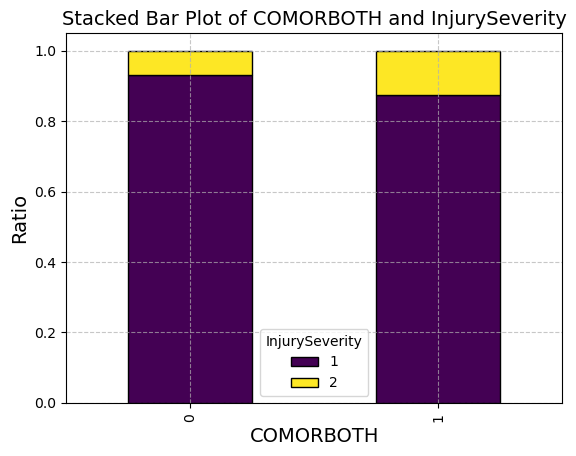

COMORBOTH
0    1890
1     198
Name: count, dtype: int64


In [15]:
stacked_bar_plot('COMORBOTH', ciss_df)

<Figure size 3000x2100 with 0 Axes>

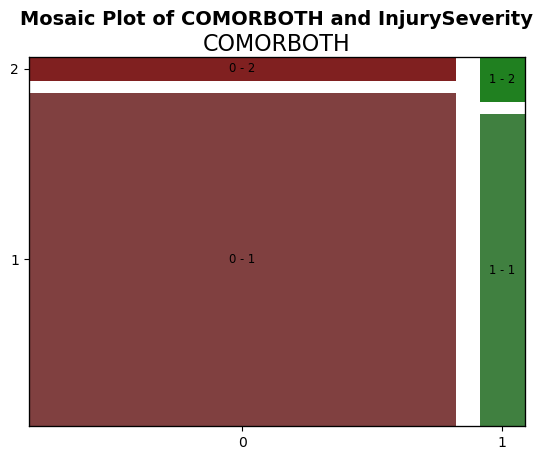

In [16]:
mosaic_plot('COMORBOTH', ciss_df)

In [17]:
calc_effect_of_disease('COMORBOTH', ciss_df)

Ratio of severe injury is 0.067 without medical record, and is 0.126 when with it.


### IMPLANTFUS

<Figure size 1000x700 with 0 Axes>

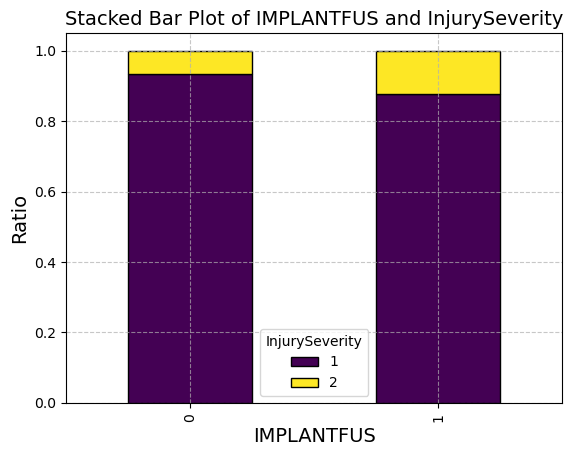

IMPLANTFUS
0    1868
1     220
Name: count, dtype: int64


In [18]:
stacked_bar_plot('IMPLANTFUS', ciss_df)

<Figure size 3000x2100 with 0 Axes>

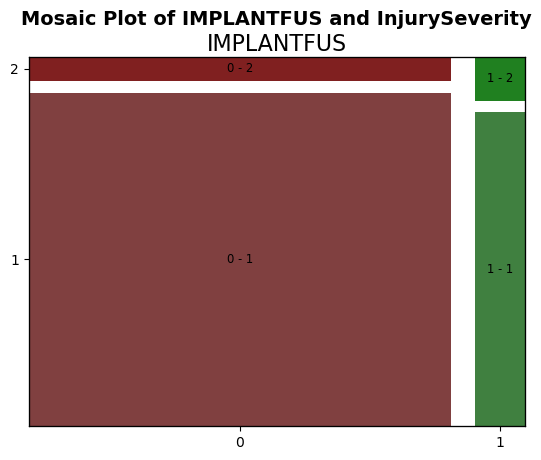

In [19]:
mosaic_plot('IMPLANTFUS', ciss_df)

In [20]:
calc_effect_of_disease('IMPLANTFUS', ciss_df)

Ratio of severe injury is 0.067 without medical record, and is 0.123 when with it.


### SPINEDEGEN

<Figure size 1000x700 with 0 Axes>

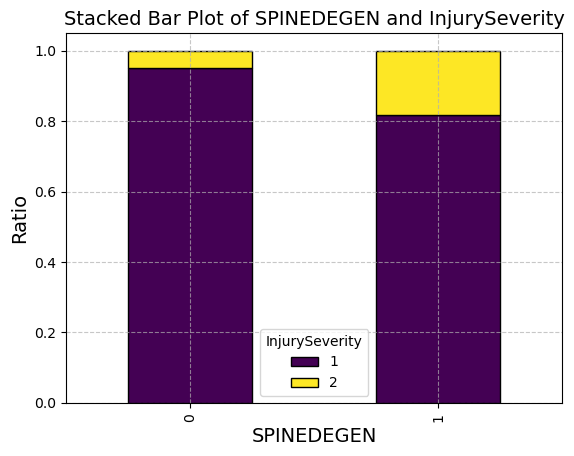

SPINEDEGEN
0    1690
1     398
Name: count, dtype: int64


In [21]:
stacked_bar_plot('SPINEDEGEN',ciss_df)

In [22]:
calc_effect_of_disease('SPINEDEGEN', ciss_df)

Ratio of severe injury is 0.047 without medical record, and is 0.181 when with it.


### OSTEOCOND

<Figure size 1000x700 with 0 Axes>

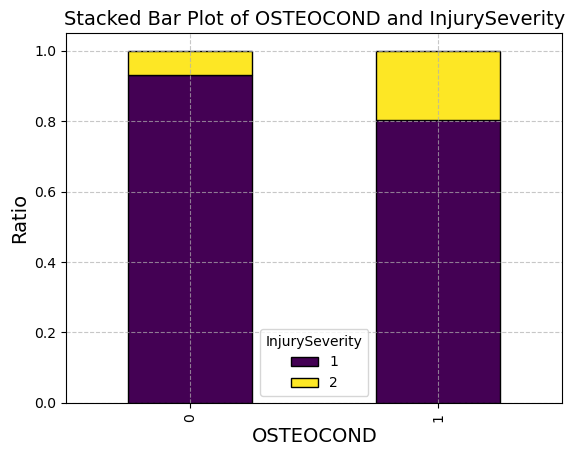

OSTEOCOND
0    2027
1      61
Name: count, dtype: int64


In [23]:
stacked_bar_plot('OSTEOCOND', ciss_df)

In [24]:
calc_effect_of_disease('OSTEOCOND', ciss_df)

Ratio of severe injury is 0.069 without medical record, and is 0.197 when with it.


### IMPAIREDCOAG

<Figure size 1000x700 with 0 Axes>

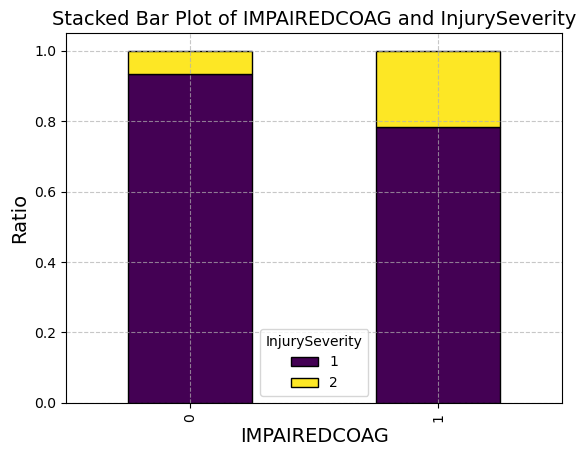

IMPAIREDCOAG
0    2000
1      88
Name: count, dtype: int64


In [25]:
stacked_bar_plot('IMPAIREDCOAG', ciss_df)

In [26]:
calc_effect_of_disease('IMPAIREDCOAG', ciss_df)

Ratio of severe injury is 0.067 without medical record, and is 0.216 when with it.


### CARDIOCOND

<Figure size 1000x700 with 0 Axes>

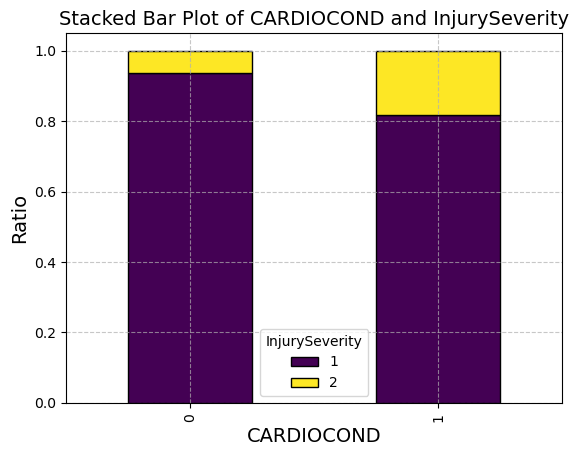

CARDIOCOND
0    1919
1     169
Name: count, dtype: int64


In [27]:
stacked_bar_plot('CARDIOCOND', ciss_df)

In [28]:
calc_effect_of_disease('CARDIOCOND', ciss_df)

Ratio of severe injury is 0.063 without medical record, and is 0.183 when with it.


## Check Maneuver

### Process Maneuver for NASS/CISS

#### NASS

In [29]:
nass = anl_df.loc[anl_df['source'] == 1]

In [30]:
'''
Maneuver Grouping:
        
        0. No avoidance
        1. Break
        2. Accelerate
        3. Turn Left
        4. Turn Right
'''

nass['Maneuver'] = 65536

for idx in nass.index:
    if nass.loc[idx, 'Maneuver before collision'] == 1:
        nass.loc[idx, 'Maneuver'] = 0
    elif  nass.loc[idx, 'Maneuver before collision'] in [2, 3, 4, 5]:
        nass.loc[idx, 'Maneuver'] = 1
    elif  nass.loc[idx, 'Maneuver before collision'] == 10:
        nass.loc[idx, 'Maneuver'] = 2
    elif  nass.loc[idx, 'Maneuver before collision'] in [6, 8, 11]:
        nass.loc[idx, 'Maneuver'] = 3
    elif  nass.loc[idx, 'Maneuver before collision'] in [7, 9, 12]:
        nass.loc[idx, 'Maneuver'] = 4

nass = nass.loc[nass['Maneuver'] != 65536]
nass['Maneuver'].value_counts()

C:\Users\cquwj\AppData\Local\Temp\ipykernel_22524\3289009310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nass['Maneuver'] = 65536


Maneuver
0    3050
1    1138
4     459
3     326
2      75
Name: count, dtype: int64

#### CISS

In [31]:
ciss = anl_df.loc[anl_df['source'] == 2]

In [32]:
'''
Maneuver Grouping:
        
        0. No avoidance
        1. Break
        2. Accelerate
        3. Turn Left
        4. Turn Right
'''

ciss['Maneuver'] = 65536

for idx in ciss.index:
    if ciss.loc[idx, 'Maneuver before collision'] == 1:
        ciss.loc[idx, 'Maneuver'] = 0
    elif  ciss.loc[idx, 'Maneuver before collision'] in [2, 5, 6]:
        ciss.loc[idx, 'Maneuver'] = 1
    elif  ciss.loc[idx, 'Maneuver before collision'] == 9:
        ciss.loc[idx, 'Maneuver'] = 2
    elif  ciss.loc[idx, 'Maneuver before collision'] in [3, 7, 10]:
        ciss.loc[idx, 'Maneuver'] = 3
    elif  ciss.loc[idx, 'Maneuver before collision'] in [4, 8, 11]:
        ciss.loc[idx, 'Maneuver'] = 4

ciss = ciss.loc[ciss['Maneuver'] != 65536]
ciss['Maneuver'].value_counts()

C:\Users\cquwj\AppData\Local\Temp\ipykernel_22524\4200250499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ciss['Maneuver'] = 65536


Maneuver
0    1517
1     745
4     519
3     449
2      85
Name: count, dtype: int64

#### Combine nass / ciss

In [33]:
man_df = pd.concat([nass, ciss], axis=0)
man_df

,Model Year,Uphill or Downhill,Related to Intersection,Maneuver before collision,Clock-form Direction of force,Day in Week,Race,IMPLANTFUS,year,SPINEDEGEN,...,CASEWGT,Sex,Surface Condition,Speed Limit,Distracted in Driving,InjurySeverity,Conformal Set,Set Size,not in predicted,Maneuver
0,2008,1,3,1,170,4,1,0,2009,0,...,45,2,1,89,1,1,"{0: 0.4769, 1: 0.5231}",2,0,0
1,2003,1,2,1,350,7,1,0,2009,0,...,29,2,1,56,1,1,"{1: 0.4196, 2: 0.5804}",2,0,0
2,2005,4,0,2,350,1,1,0,2009,0,...,42,2,3,89,1,1,"{1: 0.506, 2: 0.494}",2,0,1
3,2005,2,3,1,30,5,1,0,2009,0,...,24,1,1,89,1,1,"{0: 0.3025, 1: 0.3536, 2: 0.3439}",3,0,0
4,2005,4,3,8,10,5,1,0,2009,0,...,1887,1,1,56,1,0,"{0: 0.561, 1: 0.439}",2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,2018,1,2,4,10,5,1,0,2022,0,...,321,2,2,97,1,1,"{0: 0.4447, 1: 0.5553}",2,0,4
8801,2019,4,2,2,350,4,3,65536,2022,65536,...,644,1,1,56,1,0,"{0: 0.5665, 1: 0.4335}",2,0,1
8802,2020,1,2,9,30,7,1,65536,2022,65536,...,4911,2,1,56,1,0,"{0: 0.4833, 1: 0.5167}",2,0,2
8803,2022,1,2,3,350,6,1,65536,2022,65536,...,994,1,1,72,1,0,"{0: 0.5569, 1: 0.4431}",2,0,3


### Divide by crash type & total analysis

In fact, no obvious correlation is found...

In [34]:
rear_end = man_df.loc[man_df['Crash Type'] == 1]
head_on = man_df.loc[man_df['Crash Type'] == 2]
angle = man_df.loc[man_df['Crash Type'] == 4]
side_same_dir = man_df.loc[man_df['Crash Type'] == 5]
side_oppo_dir = man_df.loc[man_df['Crash Type'] == 6]

xticks = ['No avoidance', 'Break', 'Accelerate', 'Turn Left', 'Turn Right']

<Figure size 1000x700 with 0 Axes>

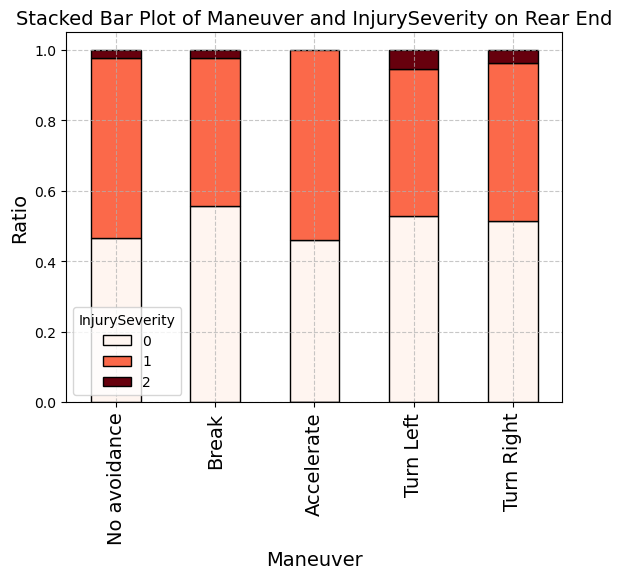

Maneuver
0    931
1    500
4    140
3    110
2     13
Name: count, dtype: int64


In [38]:
stacked_bar_plot('Maneuver', rear_end, crashtype='Rear End', xticks=xticks)

<Figure size 1000x700 with 0 Axes>

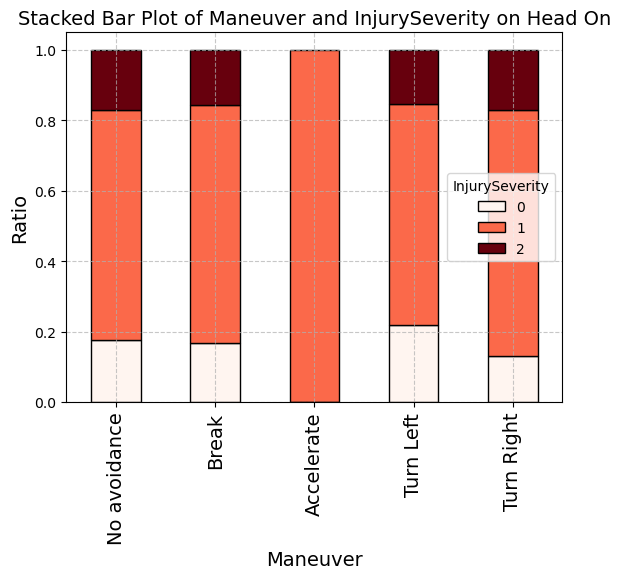

Maneuver
0    205
4    129
1     96
3     46
2      2
Name: count, dtype: int64


In [39]:
stacked_bar_plot('Maneuver', head_on, crashtype='Head On', xticks=xticks)

<Figure size 1000x700 with 0 Axes>

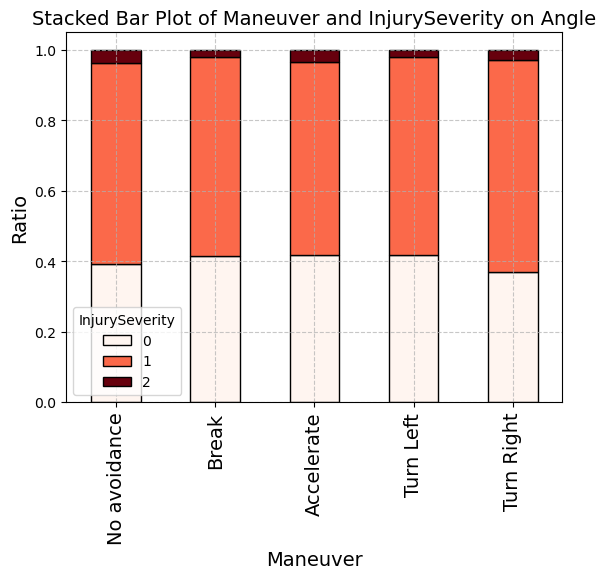

Maneuver
0    3131
1    1208
3     567
4     562
2     141
Name: count, dtype: int64


In [40]:
stacked_bar_plot('Maneuver', angle, crashtype='Angle',xticks=xticks)

<Figure size 1000x700 with 0 Axes>

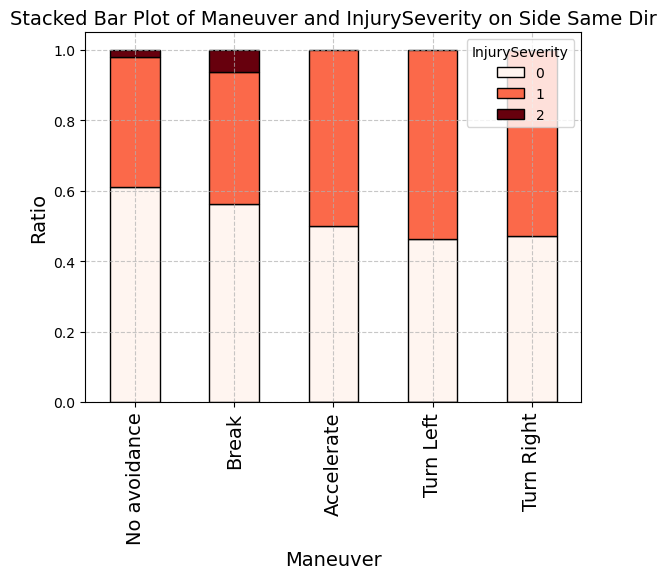

Maneuver
0    203
4     36
1     32
3     28
2      4
Name: count, dtype: int64


In [41]:
stacked_bar_plot('Maneuver', side_same_dir, crashtype='Side Same Dir',xticks=xticks)

<Figure size 1000x700 with 0 Axes>

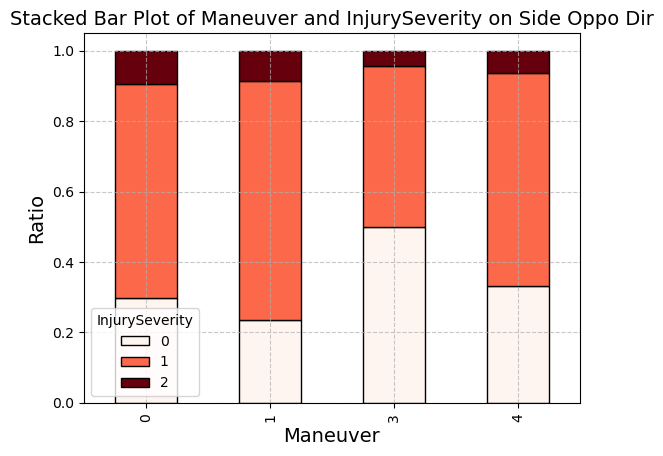

Maneuver
4    111
0     97
1     47
3     24
Name: count, dtype: int64


In [42]:
stacked_bar_plot('Maneuver', side_oppo_dir, crashtype='Side Oppo Dir')

### Analyze CP-hard (Severe Only for the model is already prone to predict severe!)

In [43]:
anl_df_hard_severe = anl_df_h.loc[anl_df_h['InjurySeverity'] == 2]

In [44]:
anl_feas = [
    'IMPLANTFUS', 'SPINEDEGEN' , 'OSTEOCOND', 'IMPAIREDCOAG', 
    'COMORBOTH', 'delta v', 'CARDIOCOND', 'InjurySeverity'
]


In [45]:
hard_cps = anl_df_hard_severe[anl_feas]

In [46]:
wierd_cases = hard_cps.loc[(hard_cps['IMPLANTFUS'] == 0) & (hard_cps['SPINEDEGEN'] == 0) &
                          (hard_cps['OSTEOCOND'] == 0) & (hard_cps['IMPAIREDCOAG'] == 0) &
                          (hard_cps['COMORBOTH'] == 0) & (hard_cps['CARDIOCOND'] == 0)]

In [49]:
wired_cases = len(wierd_cases)
print("CP hard cases with even medical records is %s cases from %s cases" % (wired_cases, len(hard_cps)))

CP hard cases with even medical records is 30 cases from 43 cases
